<a href="https://colab.research.google.com/github/GoZaZombie/CTIP-Assignment-2/blob/main/NaiveBayesTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


#import datasets

EmailSpamData = pd.read_csv(r'../DataSets/emails.csv', encoding='latin-1')
SMSSpamData = pd.read_csv(r'../DataSets/spam.csv', encoding='latin-1')


#Normalizing the column name scheme
SMSSpamData = SMSSpamData.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
SMSSpamData = SMSSpamData.rename(columns={'v1': 'Classification', 'v2': 'Message'})
EmailSpamData1 = EmailSpamData.rename(columns={'text': 'Message','spam': 'Classification'})

#reorder Columns
EmailSpamData1 = EmailSpamData1[['Message', 'Classification']]
SMSSpamData = SMSSpamData[['Message', 'Classification']]


#normalize values for spam and "ham"
SMSSpamData.loc[SMSSpamData['Classification'] == 'spam', 'Classification'] = 1
SMSSpamData.loc[SMSSpamData['Classification'] == 'ham', 'Classification'] = 0






# prepare data for Naive Bayes

vectorizer = TfidfVectorizer(
    #stop_words ='english', 
    #ngram_range=(1,2),
    #lowercase=True
) 
#vectorizer = CountVectorizer()


X = vectorizer.fit_transform(SMSSpamData['Message'])
Y = SMSSpamData['Classification'].astype(int) #seperates the data into x and y. x being the messages and y being the classification.

X_TrainData, X_TestData, Y_TrainData, Y_TestData = train_test_split(X, Y , test_size=0.2, random_state =42) #splits the data into training and testing sets, currently 80 - 20 split


# Initialize and train Naive Bayes model
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_TrainData, Y_TrainData)


# Evaluate the model
Y_PredData = naive_bayes_model.predict(X_TestData)

print("\nConfusion Matrix:") #TP FP FN TN
print(confusion_matrix(Y_TestData, Y_PredData))

print("\nClassification Report:")
print(classification_report(Y_TestData, Y_PredData))


Confusion Matrix:
[[965   0]
 [ 42 108]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [9]:
joblib.dump(naive_bayes_model, "NaiveBayesModel.pkl")
joblib.dump(vectorizer, "NaiveBayesVectorizer.pkl")

['NaiveBayesVectorizer.pkl']

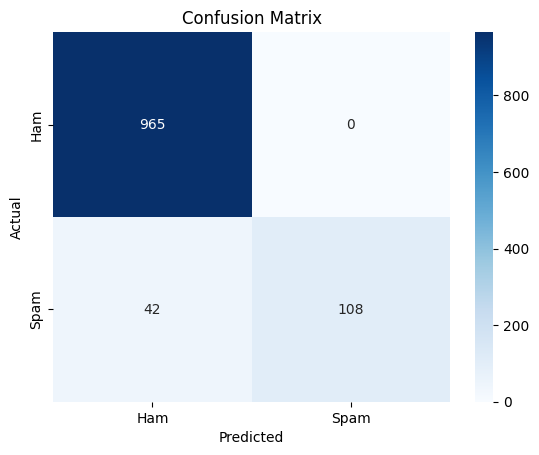

Classification
0    4825
1     747
Name: count, dtype: int64


In [10]:
cm = confusion_matrix(Y_TestData, Y_PredData)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(SMSSpamData['Classification'].value_counts())
